<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px"><br>
<a href="https://imgbb.com/"><img src="https://i.ibb.co/cNPkhPL/nahdi.png" style="float: center; margin: -30px; height: 130px"></a>

<br>

# Project 3: Sharing Dataset on Kaggle

_[Alnahdi Pharmacy(online shop)](https://www.nahdionline.com/en/)_

---

In [53]:
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
from time import sleep
from selenium import webdriver
import seaborn as sns
import matplotlib.pyplot as plt 

---

# Extract Data


I choose the Skin Care section from the website, and it contain 7subsections:
 - [Hand & Foot Care.]("https://www.nahdionline.com/en/skin-care/hand-foot-care?product_list_limit=84")
 - [Bath & Body Care.]("https://www.nahdionline.com/en/skin-care/bath-body?product_list_limit=84")
 - [Facial Care.]('https://www.nahdionline.com/en/skin-care/facial-care?p=2&product_list_limit=84')
 - [Tools And Accessories.]('https://www.nahdionline.com/en/skin-care/tools-and-accessories?product_list_limit=84')
 - [Sun Care.]('https://www.nahdionline.com/en/skin-care/sun-care?product_list_limit=84')
 - [Shop by health.]('https://www.nahdionline.com/en/skin-care/shop-by-helth-concern')
 - [Skin Supplements.]("https://www.nahdionline.com/en/skin-care/skin-supplements?product_list_limit=84")
 
I will go through them one by one for each page and pull the data by using `requests`, `For` loops  and `beautifullsoup` pbjects 


###  - HAND FOOT CARE 

In [392]:
response = requests.get("https://www.nahdionline.com/en/skin-care/hand-foot-care?product_list_limit=84")
#response.status_code
HTML = response.text 
soup = BeautifulSoup(HTML, 'lxml')
items_lis = []
items_list = soup.find_all('li', attrs={'class':'item product product-item'})

item_img = []  
item_name = []
item_brand = []
item_price = []

for item in items_list:
    item_img.append(item.find('img', attrs={'class':'product-image-photo'})['src'])
    item_name.append(item.find('img', attrs={'class':'product-image-photo'})['alt'])
    item_brand.append(item.find('span',attrs={'class':'attribute manufacturer'}).text.strip())
    item_price.append(item.find('span',attrs={'class':'price-wrapper'})['data-price-amount'])
    

# of the rest pages
n_pages = [2,3,4]
for n in n_pages:
    res = 'https://www.nahdionline.com/en/skin-care/hand-foot-care?p='+ str(n) +'&product_list_limit=84'
    response = requests.get(res)
    #print(response.status_code)
    HTML = response.text
    soup = BeautifulSoup(HTML, 'lxml')
    items_list = []
    items_list = soup.find_all('li', attrs={'class':'item product product-item'})
    #print(len(items_list))
    for item in items_list:
        item_img.append(item.find('img', attrs={'class':'product-image-photo'})['src'])
        item_name.append(item.find('img', attrs={'class':'product-image-photo'})['alt'])
        item_brand.append(item.find('span',attrs={'class':'attribute manufacturer'}).text.strip())
        item_price.append(item.find('span',attrs={'class':'price-wrapper'})['data-price-amount']) 

In [394]:
#create dataframe
hand_foot_df = pd.DataFrame()

hand_foot_df['ITEM_NAME'],hand_foot_df['ITEM_BRAND'],hand_foot_df['ITEM_PRICE'],hand_foot_df['ITEM_IMG'] = [item_name, item_brand , item_price , item_img]

---

 ### - Bath & Body Care 

In [396]:
response = requests.get("https://www.nahdionline.com/en/skin-care/bath-body?product_list_limit=84")
HTML = response.text 
soup = BeautifulSoup(HTML, 'lxml')
items_list = []
items_list = soup.find_all('li', attrs={'class':'item product product-item'}) #the item's boitems_list)


item_img = []  
item_name = []
item_brand = []
item_price = []

for item in items_list:
    item_img.append(item.find('img', attrs={'class':'product-image-photo'})['src'])
    item_name.append(item.find('img', attrs={'class':'product-image-photo'})['alt'])
    item_brand.append(item.find('span',attrs={'class':'attribute manufacturer'}).text.strip())
    item_price.append(item.find('span',attrs={'class':'price-wrapper'})['data-price-amount'])
    
    
# rest pages
n_pages = [2,3,4,5,6,7,8,9,10]
for n in n_pages:
    res = 'https://www.nahdionline.com/en/skin-care/bath-body?p='+ str(n) +'&product_list_limit=84'
    response = requests.get(res)
    #print(response.status_code)
    HTML = response.text
    soup = BeautifulSoup(HTML, 'lxml')
    items_list = []
    items_list = soup.find_all('li', attrs={'class':'item product product-item'})
    #print(len(items_list))
    for item in items_list:
        item_img.append(item.find('img', attrs={'class':'product-image-photo'})['src'])
        item_name.append(item.find('img', attrs={'class':'product-image-photo'})['alt'])
        item_brand.append(item.find('span',attrs={'class':'attribute manufacturer'}).text.strip())
        item_price.append(item.find('span',attrs={'class':'price-wrapper'})['data-price-amount'])

In [398]:
#create df
bath_body_df = pd.DataFrame()

bath_body_df['ITEM_NAME'],bath_body_df['ITEM_BRAND'],bath_body_df['ITEM_PRICE'],bath_body_df['ITEM_IMG'] = [item_name, item_brand , item_price , item_img]

---

### - Facial Care

In [400]:
response = requests.get('https://www.nahdionline.com/en/skin-care/facial-care?p=2&product_list_limit=84')
HTML = response.text
soup = BeautifulSoup(HTML, 'lxml')
items_list = []
items_list = soup.find_all('li', attrs={'class':'item product product-item'}) #the item's boitems_list)


item_img = []  
item_name = []
item_brand = []
item_price = []

for item in items_list:
    item_img.append(item.find('img', attrs={'class':'product-image-photo'})['src'])
    item_name.append(item.find('img', attrs={'class':'product-image-photo'})['alt'])
    item_brand.append(item.find('span',attrs={'class':'attribute manufacturer'}).text.strip())
    item_price.append(item.find('span',attrs={'class':'price-wrapper'})['data-price-amount'])
    
#rest pages
n_pages = [3,4,5,6,7,8,9,10]
for n in n_pages:
    
    res = 'https://www.nahdionline.com/en/skin-care/facial-care?p='+ str(n)+'&product_list_limit=84'
    response = requests.get(res)
    #print(response.status_code)
    HTML = response.text
    soup = BeautifulSoup(HTML, 'lxml')
    items_list = []
    items_list = soup.find_all('li', attrs={'class':'item product product-item'})
    #print(len(items_list))
    for item in items_list:
        item_img.append(item.find('img', attrs={'class':'product-image-photo'})['src'])
        item_name.append(item.find('img', attrs={'class':'product-image-photo'})['alt'])
        item_brand.append(item.find('span',attrs={'class':'attribute manufacturer'}).text.strip())
        item_price.append(item.find('span',attrs={'class':'price-wrapper'})['data-price-amount']) 

In [402]:
#create df
facial_care_df = pd.DataFrame()
facial_care_df['ITEM_NAME'],facial_care_df['ITEM_BRAND'],facial_care_df['ITEM_PRICE'],facial_care_df['ITEM_IMG'] = [item_name, item_brand, item_price , item_img]

---

### - Tools And Accessories

In [404]:
response = requests.get('https://www.nahdionline.com/en/skin-care/tools-and-accessories?product_list_limit=84')
HTML = response.text
soup = BeautifulSoup(HTML, 'lxml')
items_list = []
items_list = soup.find_all('li', attrs={'class':'item product product-item'}) #the item's boitems_list)


item_img = []  
item_name= []
item_brand = []
item_price = []

for item in items_list:
    item_img.append(item.find('img', attrs={'class':'product-image-photo'})['src'])
    item_name.append(item.find('img', attrs={'class':'product-image-photo'})['alt'])
    item_brand.append(item.find('span',attrs={'class':'attribute manufacturer'}).text.strip())
    item_price.append(item.find('span',attrs={'class':'price-wrapper'})['data-price-amount'])
    
# rest pages
n_pages = [2]
for n in n_pages:
    res = 'https://www.nahdionline.com/en/skin-care/tools-and-accessories?p='+ str(n) +'&product_list_limit=84'
    response = requests.get(res)
    HTML = response.text
    soup = BeautifulSoup(HTML, 'lxml')
    items_list = []
    items_list = soup.find_all('li', attrs={'class':'item product product-item'})
    for item in items_list:
        item_img.append(item.find('img', attrs={'class':'product-image-photo'})['src'])
        item_name.append(item.find('img', attrs={'class':'product-image-photo'})['alt'])
        item_brand.append(item.find('span',attrs={'class':'attribute manufacturer'}).text.strip())
        item_price.append(item.find('span',attrs={'class':'price-wrapper'})['data-price-amount'])

In [406]:
Tool_Acc_df = pd.DataFrame()

Tool_Acc_df['ITEM_NAME'],Tool_Acc_df['ITEM_BRAND'],Tool_Acc_df['ITEM_PRICE'],Tool_Acc_df['ITEM_IMG'] = [item_name, item_brand, item_price , item_img]

---

### -  Sun Care

In [408]:
response = requests.get('https://www.nahdionline.com/en/skin-care/sun-care?product_list_limit=84')
HTML = response.text
soup = BeautifulSoup(HTML, 'lxml')
items_list = []
items_list = soup.find_all('li', attrs={'class':'item product product-item'}) #the item's boitems_list)


item_img = []  
item_name= []
item_brand = []
item_price = []

for item in items_list:
    item_img.append(item.find('img', attrs={'class':'product-image-photo'})['src'])
    item_name.append(item.find('img', attrs={'class':'product-image-photo'})['alt'])
    item_brand.append(item.find('span',attrs={'class':'attribute manufacturer'}).text.strip())
    item_price.append(item.find('span',attrs={'class':'price-wrapper'})['data-price-amount'])
    
# rest pages
n_pages = [2]
for n in n_pages:

    res = 'https://www.nahdionline.com/en/skin-care/sun-care?p='+str(n)+'&product_list_limit=84'
    response = requests.get(res)
    HTML = response.text
    soup = BeautifulSoup(HTML, 'lxml')
    items_list = []
    items_list = soup.find_all('li', attrs={'class':'item product product-item'})
    for item in items_list:
        item_img.append(item.find('img', attrs={'class':'product-image-photo'})['src'])
        item_name.append(item.find('img', attrs={'class':'product-image-photo'})['alt'])
        item_brand.append(item.find('span',attrs={'class':'attribute manufacturer'}).text.strip())
        item_price.append(item.find('span',attrs={'class':'price-wrapper'})['data-price-amount']) 


In [410]:
sun_care_df = pd.DataFrame()

sun_care_df['ITEM_NAME'],sun_care_df['ITEM_BRAND'],sun_care_df['ITEM_PRICE'],sun_care_df['ITEM_IMG'] = [item_name, item_brand, item_price , item_img]

---

### - Shop by health 

In [412]:
response = requests.get('https://www.nahdionline.com/en/skin-care/shop-by-helth-concern')
HTML = response.text
soup = BeautifulSoup(HTML, 'lxml')
items_list = []
items_list = soup.find_all('li', attrs={'class':'item product product-item'}) 

item_img = []  
item_name= []
item_brand = []
item_price = []

for item in items_list:
    item_img.append(item.find('img', attrs={'class':'product-image-photo'})['src'])
    item_name.append(item.find('img', attrs={'class':'product-image-photo'})['alt'])
    item_brand.append(item.find('span',attrs={'class':'attribute manufacturer'}).text.strip())
    item_price.append(item.find('span',attrs={'class':'price-wrapper'})['data-price-amount'])

In [414]:
by_health_df = pd.DataFrame()

by_health_df['ITEM_NAME'],by_health_df['ITEM_BRAND'],by_health_df['ITEM_PRICE'],by_health_df['ITEM_IMG'] = [item_name, item_brand, item_price , item_img]

---

### - Skin Supplements

In [416]:
response = requests.get("https://www.nahdionline.com/en/skin-care/skin-supplements?product_list_limit=84")
response.status_code
HTML = response.text 
soup = BeautifulSoup(HTML, 'lxml')
items_list = []
items_list = soup.find_all('li', attrs={'class':'item product product-item'})

item_img = []  
item_name = []
item_brand = []
item_price = []

for item in items_list:
    item_img.append(item.find('img', attrs={'class':'product-image-photo'})['src'])
    item_name.append(item.find('img', attrs={'class':'product-image-photo'})['alt'])
    item_brand.append(item.find('span',attrs={'class':'attribute manufacturer'}).text.strip())
    item_price.append(item.find('span',attrs={'class':'price-wrapper'})['data-price-amount'])

In [418]:
skin_sup_df = pd.DataFrame()

skin_sup_df['ITEM_NAME'],skin_sup_df['ITEM_BRAND'],skin_sup_df['ITEM_PRICE'],skin_sup_df['ITEM_IMG'] = [item_name, item_brand, item_price , item_img]

# Cleaning and EDA  

The data I have here does not need much [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) and cleaning due to the fact that most of its columns contains categorical data ; It is a pharmany that sellies products. However , I will do some cleaning and shaping on the data.

- #### For each dataframe I'll add a column, the column contain the product category name

In [631]:
# hand_foot_df -- cat -> Hand Foot Care
# bath_body_df -- cat --> Bath and Body

# facial_care_df -- cat -> Facial Care
# Tool_Acc_df -- cat --> Tools and Accessories

# sun_care_df -- cat -> Sun Care
# skin_sup_df -- cat --> Skin Supplements

# by_health_df -- cat -> Shop by Health Concern



hand_foot_df['CATEGORY'], bath_body_df['CATEGORY'], facial_care_df['CATEGORY'], Tool_Acc_df['CATEGORY'], sun_care_df['CATEGORY'], skin_sup_df['CATEGORY'],by_health_df['CATEGORY'] = ['Hand Foot Care','Bath and Body','Facial Care','Tools and Accessories','Sun Care','Skin Supplements','Shop by Health Concern']
# show exple 

- #### Concate all the dataframes togather

In [421]:
frames = [hand_foot_df, bath_body_df,facial_care_df,Tool_Acc_df,sun_care_df,skin_sup_df,by_health_df]
nahdi_df = pd.concat(frames, ignore_index= True)

- #### Rounding the price to 2 digits 

In [422]:
str_price = nahdi_df['ITEM_PRICE']

In [423]:
float_price = [float(i) for i in str_price]

In [424]:
nahdi_df['ITEM_PRICE'] = float_price

In [425]:
for index, price in nahdi_df.ITEM_PRICE.items():
    nahdi_df.ITEM_PRICE.iloc[index] = round(price,2)

C:\Users\hsfd\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


- #### Add a status column

In [427]:
nahdi_df['ITEM_STATUES'] = ""

In [429]:
#for liquied items
liquid_words = ['ml','ML','spary','Spary', 'Cream','cream']  
for word in liquid_words:
    liquid_index = nahdi_df[nahdi_df['ITEM_NAME'].str.contains(word)].index
    for index in liquid_index:
        nahdi_df.ITEM_STATUES.iloc[index]  = 'liquid'
        

In [430]:
#for solid items
solid_words = ['gm','soap','Soap','Capsule','Tablets','Tab','tab','capsule',
                'tablets','Caps','Cap','caps','cap','Saop','saop','Sachets']  
for word in solid_words:
    solid_words = nahdi_df[nahdi_df['ITEM_NAME'].str.contains(word)].index
    for index in solid_words:
        nahdi_df.ITEM_STATUES.iloc[index]  = 'solid'


In [431]:
#and the rest with take a 'other' as a statues
nahdi_df['ITEM_STATUES'].replace('','other',inplace=True)

- #### Add a year and month column 

In [434]:
nahdi_df['YEAR'] , nahdi_df['MONTH'] = [2020, 3]

# Visualization

- Let see the prices 

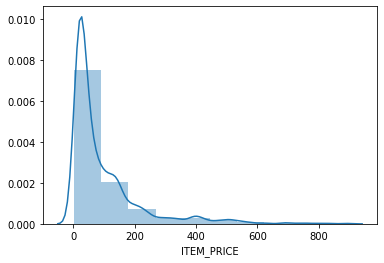

In [365]:
sns.distplot(nahdi_df.ITEM_PRICE,bins=10);

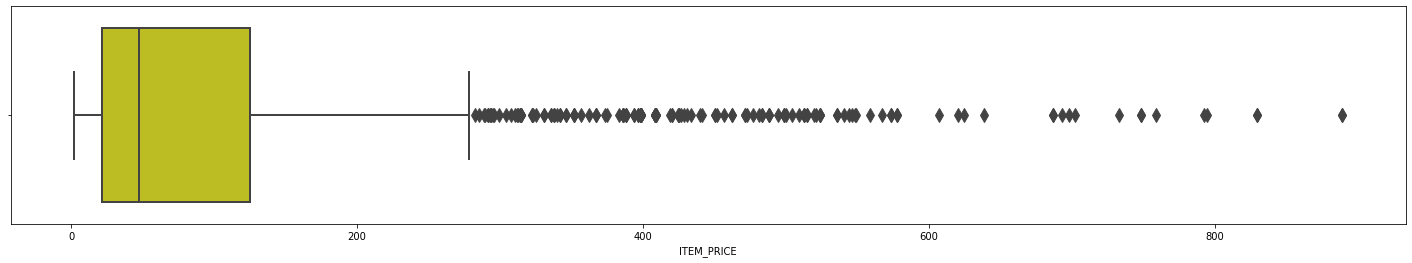

In [390]:
fig, ax = plt.subplots(figsize=(25, 4))
sns.boxplot(x='ITEM_PRICE',orient='h', fliersize=10, linewidth=2, saturation=100, ax=ax ,data=nahdi_df,color='C8');

> **_It seems that buying any skin care item would cost up to 800 RS_**

---

- let disribute the items accored to the category and see the prices 

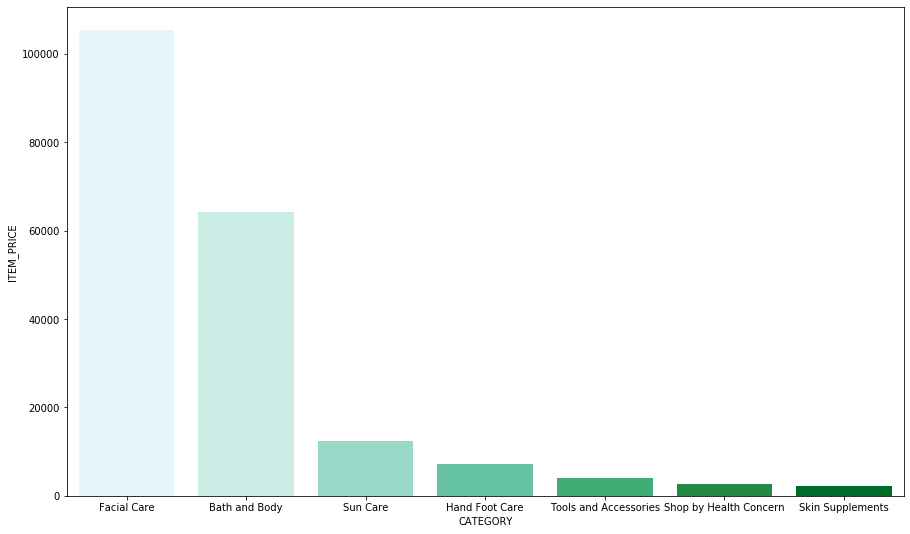

In [453]:
f = plt.figure(figsize=(15,9))
sns.barplot(nahdi_df.groupby(['CATEGORY']).sum().sort_values(by = 'ITEM_PRICE', ascending= False).index,
           nahdi_df.groupby(['CATEGORY']).sum().sort_values(by = 'ITEM_PRICE', ascending= False)['ITEM_PRICE'],saturation=5,palette='BuGn');

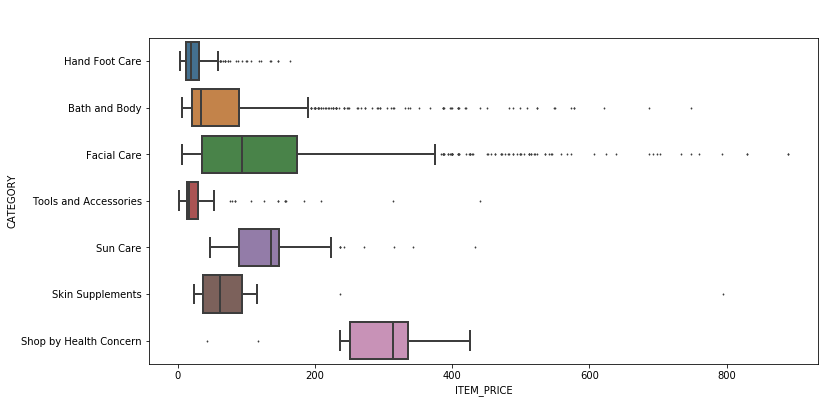

In [438]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
sns.boxplot(x='ITEM_PRICE',y='CATEGORY',data=nahdi_df, orient='h', fliersize=1, linewidth=2, 
                 saturation=0.5, ax=ax)
ax.set_title('\n')
plt.show()

> **_it's seems like that `Facial Care` and  `Bath and body` had a lot of items with prices that beyond the total. By an over all look it seems that each category has much diversity in prices_**

---

- If we inspect the product prices by their status

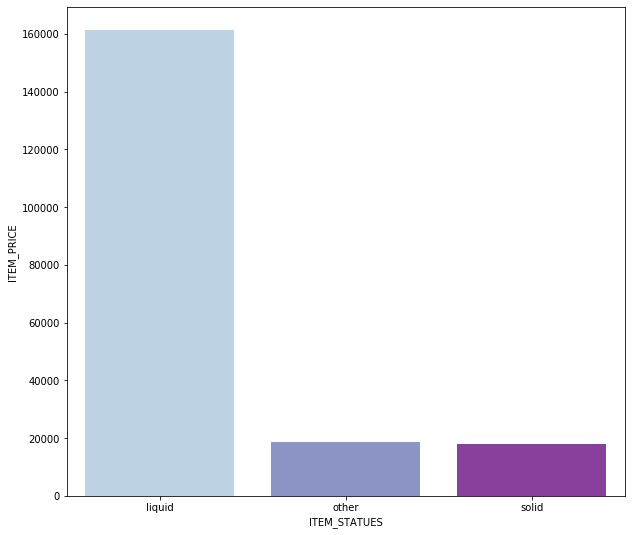

In [449]:
f = plt.figure(figsize=(10,9))
sns.barplot(nahdi_df.groupby(['ITEM_STATUES']).sum().sort_values(by = 'ITEM_PRICE', ascending= False).index,
           nahdi_df.groupby(['ITEM_STATUES']).sum().sort_values(by = 'ITEM_PRICE', ascending= False)['ITEM_PRICE'],saturation=5,palette='BuPu');

> **_It seems like the liquid products have the hightiest prices_** 

 - now I would inspect and take a deeper look into brands! 

In [558]:
plt.figure(figsize=(200,100))
sns.barplot(nahdi_df.groupby(['ITEM_BRAND']).count().sort_values(by = 'ITEM_PRICE', ascending= False).index,
           nahdi_df.groupby(['ITEM_BRAND']).count().sort_values(by = 'ITEM_PRICE', ascending= False)['ITEM_PRICE'],saturation=5,palette='YlOrRd');
plt.title("Count of Brand's Product vs The prices");

> **_The prices of the brands have a postive skew, as the number of prducts increase the prices also increse_** 

- Let choose one or two brand to look at. (I choose lux and Ego)

In [465]:
lux = nahdi_df[nahdi_df['ITEM_BRAND']=='Lux']

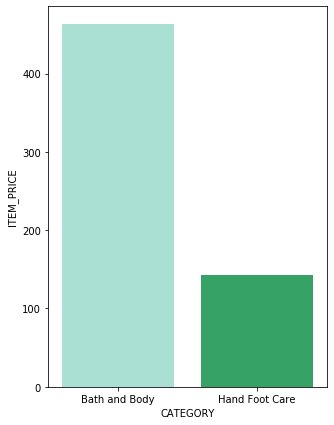

In [473]:
f = plt.figure(figsize=(5,7))
sns.barplot(lux.groupby(['CATEGORY']).sum().sort_values(by = 'ITEM_PRICE', ascending= False).index,
           lux.groupby(['CATEGORY']).sum().sort_values(by = 'ITEM_PRICE', ascending= False)['ITEM_PRICE'],saturation=5,palette='BuGn');

> **_`Lux` only have items for 2 categories only_** 

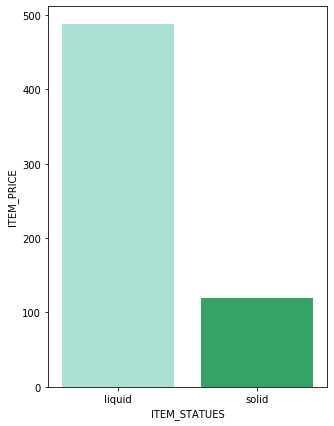

In [478]:
f = plt.figure(figsize=(5,7))
sns.barplot(lux.groupby(['ITEM_STATUES']).sum().sort_values(by = 'ITEM_PRICE', ascending= False).index,
           lux.groupby(['ITEM_STATUES']).sum().sort_values(by = 'ITEM_PRICE', ascending= False)['ITEM_PRICE'],saturation=5,palette='BuGn');

---

In [529]:
Ego = nahdi_df[nahdi_df['ITEM_BRAND']=='Ego']

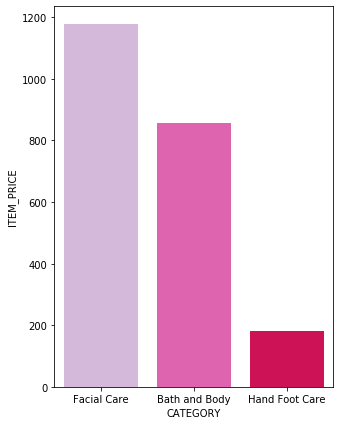

In [532]:
f = plt.figure(figsize=(5,7))
sns.barplot(Ego.groupby(['CATEGORY']).sum().sort_values(by = 'ITEM_PRICE', ascending= False).index,
           Ego.groupby(['CATEGORY']).sum().sort_values(by = 'ITEM_PRICE', ascending= False)['ITEM_PRICE'],saturation=5,palette='PuRd');

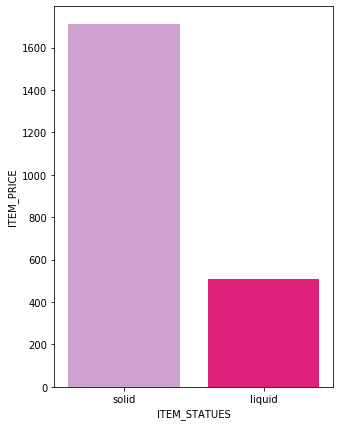

In [533]:
f = plt.figure(figsize=(5,7))
sns.barplot(Ego.groupby(['ITEM_STATUES']).sum().sort_values(by = 'ITEM_PRICE', ascending= False).index,
           Ego.groupby(['ITEM_STATUES']).sum().sort_values(by = 'ITEM_PRICE', ascending= False)['ITEM_PRICE'],saturation=5,palette='PuRd');

> **_both `lux` and `Ego` thier liquid items have higher total prices over solid but we can do more anlysis to know if this due to high pricing or the amount of products or both!_**

- So, let take a look at the relationship between prices vs status of the items

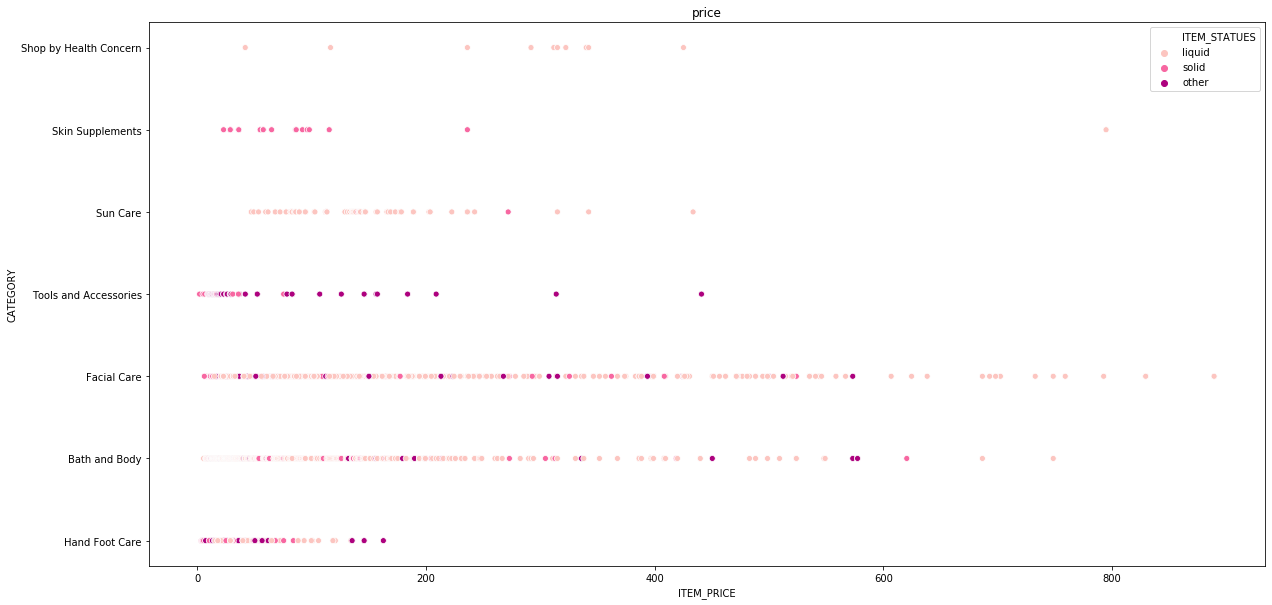

In [551]:
plt.figure(figsize=(20,10))
sns.scatterplot( x=nahdi_df.ITEM_PRICE, y=nahdi_df.CATEGORY,hue=nahdi_df.ITEM_STATUES,palette='RdPu');
plt.title("price");

> **_It seems that liquid items are the most numerous and the most varied prices_** 

- Last thing I would inspect  is take a item itself and see it's price in all different brands. let's take 'soap'

In [547]:
nahdi_df[nahdi_df['ITEM_NAME'].str.contains("soap")]

words = ['soap','Soap']  
soap_df = pd.DataFrame()
for word in words:
    soap_df = nahdi_df[nahdi_df['ITEM_NAME'].str.contains(word)]

,ITEM_NAME,ITEM_BRAND,ITEM_PRICE,ITEM_IMG,CATEGORY,ITEM_STATUES,YEAR,MONTH
10,Dettol Soap Original 2+1 Free 165g,Dettol,17.72,https://www.nahdionline.com/media/catalog/prod...,Hand Foot Care,solid,2020,3
11,Dettol Soap Skincare 2+1 Free 165g,Dettol,17.72,https://www.nahdionline.com/media/catalog/prod...,Hand Foot Care,solid,2020,3
16,Dove Soap Pink 160 gm,Dove,9.20,https://www.nahdionline.com/media/catalog/prod...,Hand Foot Care,solid,2020,3
18,Dove Soap Bar Shea Butter 135 gm,Dove,7.95,https://www.nahdionline.com/media/catalog/prod...,Hand Foot Care,solid,2020,3
19,Johnson Soap Bar Vita-Rich With Raspberry Extr...,Johnson & Johnson,3.68,https://www.nahdionline.com/media/catalog/prod...,Hand Foot Care,solid,2020,3
...,...,...,...,...,...,...,...,...
1432,Clinique Liquid Facial Soap Mild 150 ml,Clinique,78.75,https://www.nahdionline.com/media/catalog/prod...,Facial Care,solid,2020,3
1492,Natura Siberica Soap-Detox For Deep Facial Cle...,Natura Siberica,69.90,https://www.nahdionline.com/media/catalog/prod...,Facial Care,solid,2020,3
1631,Avene Cleanance Gel Soapless Cleanser 200 ml K...,Avene,114.45,https://www.nahdionline.com/media/catalog/prod...,Facial Care,solid,2020,3
1714,Simple Refreshing Facial Wash Soap Free Gel 15...,Simple,25.14,https://www.nahdionline.com/media/catalog/prod...,Facial Care,solid,2020,3


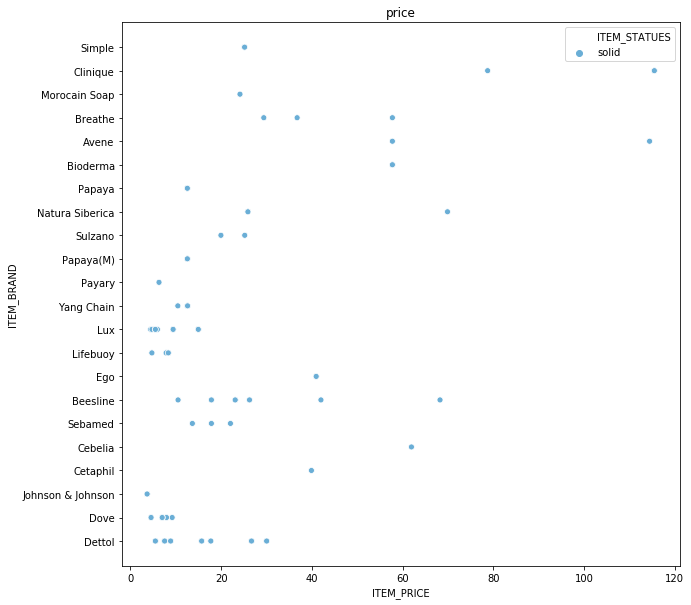

In [557]:
plt.figure(figsize=(10,10))
sns.scatterplot( x=soap_df.ITEM_PRICE, y=soap_df.ITEM_BRAND,hue=soap_df.ITEM_STATUES,palette='Blues');
plt.title("price");

> So, it looks like the brands , `Simple` and `Avene` have the highiest prices for thier soaps! 

### Save DataFrame as CSV file

In [633]:
nahdi_df.to_csv('skin_care_df.csv') 

--------

## API 


##### I tried to pull comments and likes from Al-nahdi instgram page and see how people comment and likes the products

In [3]:
import json
import requests

- The request code 
    -  I requested up to 10 posts using the request code and the short code instagram provide for each post.

``` bash
url = 'https://instagramdimashirokovv1.p.rapidapi.com/comments/B8n6WB6HAiP/optional'
headers = {
        'x-rapidapi-host': "InstagramdimashirokovV1.p.rapidapi.com",
        'x-rapidapi-key': "23210ce911msh2293e2f10104dacp1fe4eejsnc4756074881f"
        }

response = requests.request("GET", url, headers=headers)

print(response)
```

In [6]:
S_Code = 'B8n6WB6HAiP'
url = 'https://instagramdimashirokovv1.p.rapidapi.com/comments/B8n6WB6HAiP/optional'
headers = {
        'x-rapidapi-host': "InstagramdimashirokovV1.p.rapidapi.com",
        'x-rapidapi-key': "23210ce911msh2293e2f10104dacp1fe4eejsnc4756074881f"
        }

response = requests.request("GET", url, headers=headers)
response = response.json() #----------------------------------------------- Request Code ----------------------------------

comment_ls = [] #---------- simple loop to extract the info from the response ---------------------------------------------
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)
            
#create lists to store the data from the response dict            
comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    #if k =='edges':
    print(v)
        #rng = len(v)
        #for i in range(rng):
            #conent
            ##comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            #.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            #shortCode.append(S_Code) 
            

You are not subscribed to this API.


In [113]:
d_1 = pd.DataFrame()
d_1['COMMENTS'], d_1['LIKES'], d_1['PRODUCT_SHORTCODE'] = comment_ls , likes_ls ,shortCode

---

In [117]:
#shortcose for the post

S_Code = 'B9UFlPcn2Lr'


url = 'https://instagramdimashirokovv1.p.rapidapi.com/comments/B9UFlPcn2Lr/optional'
headers = {
        'x-rapidapi-host': "InstagramdimashirokovV1.p.rapidapi.com",
        'x-rapidapi-key': "23210ce911msh2293e2f10104dacp1fe4eejsnc4756074881f"
        }

response = requests.request("GET", url, headers=headers)
response = response.json()

comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)
            
#create lists to store the data from the response dict            
comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)

#create a df 
d_2 = pd.DataFrame()
d_2['COMMENTS'], d_2['LIKES'], d_2['PRODUCT_SHORTCODE'] = comment_ls , likes_ls ,shortCode

In [118]:
d_2

,COMMENTS,LIKES,PRODUCT_SHORTCODE
0,@nahdihope هل تتوفر عندكم حبوب برايورين للشعر,False,B9UFlPcn2Lr
1,عندگ مشاگل ب البشرة🧡 گلف نمش ❤حب❤ شباب ❤ندب❤را...,False,B9UFlPcn2Lr
2,هل مناسب للبشره الحساسه,False,B9UFlPcn2Lr
3,المنتج بكم,False,B9UFlPcn2Lr
4,وش افضل مرطب للبشره الدهنيه ؟,False,B9UFlPcn2Lr
5,طيب حطو السعار,False,B9UFlPcn2Lr
6,عندكم المنتج eve serum ؟,False,B9UFlPcn2Lr
7,😍,False,B9UFlPcn2Lr
8,Oh I love @neutrogename face wash !!,False,B9UFlPcn2Lr


---

In [120]:
#shortcose for the post

S_Code = 'B9L3IKFnnpo'


url = 'https://instagramdimashirokovv1.p.rapidapi.com/comments/B9L3IKFnnpo/optional'
headers = {
        'x-rapidapi-host': "InstagramdimashirokovV1.p.rapidapi.com",
        'x-rapidapi-key': "23210ce911msh2293e2f10104dacp1fe4eejsnc4756074881f"
        }

response = requests.request("GET", url, headers=headers)
response = response.json()

comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)
            
#create lists to store the data from the response dict            
comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)

#create a df 
d_3 = pd.DataFrame()
d_3['COMMENTS'], d_3['LIKES'], d_3['PRODUCT_SHORTCODE'] = comment_ls , likes_ls ,shortCode

---

In [124]:
#shortcose for the post

S_Code = 'B8gdLJGn5Uw'


url = 'https://instagramdimashirokovv1.p.rapidapi.com/comments/B8gdLJGn5Uw/optional'
headers = {
        'x-rapidapi-host': "InstagramdimashirokovV1.p.rapidapi.com",
        'x-rapidapi-key': "23210ce911msh2293e2f10104dacp1fe4eejsnc4756074881f"
        }

response = requests.request("GET", url, headers=headers)
response = response.json()

comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)
            
#create lists to store the data from the response dict            
comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)

#create a df 
d_4 = pd.DataFrame()
d_4['COMMENTS'], d_4['LIKES'], d_4['PRODUCT_SHORTCODE'] = comment_ls , likes_ls ,shortCode

---

In [126]:
#shortcose for the post

S_Code = 'B8bkxnjBKmo'


url = 'https://instagramdimashirokovv1.p.rapidapi.com/comments/B8bkxnjBKmo/optional'
headers = {
        'x-rapidapi-host': "InstagramdimashirokovV1.p.rapidapi.com",
        'x-rapidapi-key': "23210ce911msh2293e2f10104dacp1fe4eejsnc4756074881f"
        }

response = requests.request("GET", url, headers=headers)
response = response.json()

comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)
            
#create lists to store the data from the response dict            
comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)

#create a df 
d_5 = pd.DataFrame()
d_5['COMMENTS'], d_5['LIKES'], d_5['PRODUCT_SHORTCODE'] = comment_ls , likes_ls ,shortCode

---

In [128]:
#shortcose for the post

S_Code = 'B8eKbANnHwL'


url = 'https://instagramdimashirokovv1.p.rapidapi.com/comments/B8eKbANnHwL/optional'
headers = {
        'x-rapidapi-host': "InstagramdimashirokovV1.p.rapidapi.com",
        'x-rapidapi-key': "23210ce911msh2293e2f10104dacp1fe4eejsnc4756074881f"
        }

response = requests.request("GET", url, headers=headers)
response = response.json()

comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)
            
#create lists to store the data from the response dict            
comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)

#create a df 
d_6 = pd.DataFrame()
d_6['COMMENTS'], d_6['LIKES'], d_6['PRODUCT_SHORTCODE'] = comment_ls , likes_ls ,shortCode

---

In [130]:
#shortcose for the post

S_Code = 'B8RKwZtnmZt'


url = 'https://instagramdimashirokovv1.p.rapidapi.com/comments/B8RKwZtnmZt/optional'
headers = {
        'x-rapidapi-host': "InstagramdimashirokovV1.p.rapidapi.com",
        'x-rapidapi-key': "23210ce911msh2293e2f10104dacp1fe4eejsnc4756074881f"
        }

response = requests.request("GET", url, headers=headers)
response = response.json()

comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)
            
#create lists to store the data from the response dict            
comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)

#create a df 
d_7 = pd.DataFrame()
d_7['COMMENTS'], d_7['LIKES'], d_7['PRODUCT_SHORTCODE'] = comment_ls , likes_ls ,shortCode

---

In [131]:
#shortcose for the post

S_Code = 'B7tjHiKnPIC'


url = 'https://instagramdimashirokovv1.p.rapidapi.com/comments/B7tjHiKnPIC/optional'
headers = {
        'x-rapidapi-host': "InstagramdimashirokovV1.p.rapidapi.com",
        'x-rapidapi-key': "23210ce911msh2293e2f10104dacp1fe4eejsnc4756074881f"
        }

response = requests.request("GET", url, headers=headers)
response = response.json()

comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)
            
#create lists to store the data from the response dict            
comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)

#create a df 
d_8 = pd.DataFrame()
d_8['COMMENTS'], d_8['LIKES'], d_8['PRODUCT_SHORTCODE'] = comment_ls , likes_ls ,shortCode

---

In [133]:
#shortcose for the post

S_Code = 'B7mAECFhAo1'


url = 'https://instagramdimashirokovv1.p.rapidapi.com/comments/B7mAECFhAo1/optional'
headers = {
        'x-rapidapi-host': "InstagramdimashirokovV1.p.rapidapi.com",
        'x-rapidapi-key': "23210ce911msh2293e2f10104dacp1fe4eejsnc4756074881f"
        }

response = requests.request("GET", url, headers=headers)
response = response.json()

comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)
            
#create lists to store the data from the response dict            
comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)

#create a df 
d_9 = pd.DataFrame()
d_9['COMMENTS'], d_9['LIKES'], d_9['PRODUCT_SHORTCODE'] = comment_ls , likes_ls ,shortCode

---

In [134]:
#shortcose for the post

S_Code = 'B9cRSUChDwQ'


url = 'https://instagramdimashirokovv1.p.rapidapi.com/comments/B9cRSUChDwQ/optional'
headers = {
        'x-rapidapi-host': "InstagramdimashirokovV1.p.rapidapi.com",
        'x-rapidapi-key': "23210ce911msh2293e2f10104dacp1fe4eejsnc4756074881f"
        }

response = requests.request("GET", url, headers=headers)
response = response.json()

comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)
            
#create lists to store the data from the response dict            
comment_ls = []
likes_ls = []
shortCode = []
for k , v in response.items():
    if k =='edges':
        rng = len(v)
        for i in range(rng):
            #conent
            comment_ls.append(response['edges'][i]['node']['text'])
              #likes for the post
            likes_ls.append(response['edges'][i]['node']['viewer_has_liked'])
            # add the shortcode so we can now which comment&liks goes to which 
            shortCode.append(S_Code)

#create a df 
d_10 = pd.DataFrame()
d_10['COMMENTS'], d_10['LIKES'], d_10['PRODUCT_SHORTCODE'] = comment_ls , likes_ls ,shortCode

In [135]:
frames = 

,COMMENTS,LIKES,PRODUCT_SHORTCODE
0,بكم كرتون الكمام وكرتون القلفز لو سمحتي,False,B9cRSUChDwQ
1,السلام عليكم عندكم جل معقم اليدين من ايزي كلين...,False,B9cRSUChDwQ
2,😍,False,B9cRSUChDwQ
3,❤️,False,B9cRSUChDwQ
4,روعه غسول النيم من هيمالايا للبشرة الدهنيه 💚💚,False,B9cRSUChDwQ
5,فيه كود خصم ؟,False,B9cRSUChDwQ
6,فيه كود خصم للموقع؟,False,B9cRSUChDwQ
7,عندكم فرشاة فيليبس الالكترونية؟,False,B9cRSUChDwQ
8,متى تنتهي العروض ؟؟؟ مزيل العرق بيزلين ب٤٤,False,B9cRSUChDwQ
9,🌸,False,B9cRSUChDwQ


In [136]:
frames = [d_1 ,d_2 ,d_3 ,d_4 ,d_5 ,d_6 ,d_7, d_8 , d_9 ,d_10]
api_df = pd.concat(frames, ignore_index= True)

In [140]:
api_df.shape

(237, 3)

> **After extracting these simple of posts from a nahdi instgram account I can stop here and say that my aim of using this way to gain more info from customers about the product , is not fully meet. I've notice that people tend to not use the comments section to 
comment on the product itself they ask about different things for example or to complain. Nevertheless, I'll keep the data and try to inspect more in the future. it must have some quality value**